In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tifffile import imread
from skimage.morphology import disk
from scipy.ndimage import label, sum, binary_closing
from sklearn.metrics import f1_score, precision_score,recall_score, cohen_kappa_score

def remove_small_objects_and_connect_lines(image, min_size, connectivity):
    # Load mask from npy file
    mask = np.load('/content/drive/MyDrive/Transfere Learning research/Notebooks/samples/covington/bottom_half_test_mask.npy')
    print("image shape:", image.shape, "mask shape:", mask.shape)
    # Apply mask to image
    image = image * mask[:image.shape[0],:image.shape[1]]

    # Create a binary version of the image (needed for morphological operations)
    binary = np.array(image > 0)

    # Label each distinct object in the image
    labeled, num_objects = label(binary)

    # Calculate the size of each object
    object_sizes = sum(binary, labeled, range(num_objects + 1))

    # Create a mask that removes all objects smaller than min_size
    mask = object_sizes > min_size
    cleaned = mask[labeled]

    # Create a structuring element for the closing operation
    structure = disk(connectivity)

    # Perform closing operation to connect lines
    cleaned = binary_closing(cleaned, structure)

    return cleaned

def clip_reference_image(ref_image, target_image):
    return ref_image[:target_image.shape[0], :target_image.shape[1]]

def calculate_scores(reference, target):
    f1_stream = f1_score(reference, target,labels=[1], average = 'micro')
    precision_stream = precision_score(reference, target,labels=[1], average = 'micro')
    recall_stream = recall_score(reference, target,labels=[1], average = 'micro')
    cohen_kappa = cohen_kappa_score(reference, target)
    return precision_stream, recall_stream, f1_stream, cohen_kappa

# Define the directory
tif_file_name = '/content/drive/MyDrive/Meta_learning_research/Notebooks/predicts/reconstructed.tif'  # Change this to your directory

# Read the TIFF image
image = imread(tif_file_name)

# Remove small objects and connect lines
min_size = 250  # define your minimum size here
connectivity = 3  # define your connectivity here
image_clean = remove_small_objects_and_connect_lines(image, min_size, connectivity)

# Read the corresponding reference image
ref_image = np.load('/content/drive/MyDrive/Transfere Learning research/Notebooks/samples/covington/bottom_half_test_label.npy')

# Clip the reference images to the same size as the original and cleaned images
ref_image_clipped = clip_reference_image(ref_image, image_clean)

# Calculate the precision, recall, and F1-score
print(f"Evaluating scores for {tif_file_name}:")
precision, recall, f1, cohen_kappa = calculate_scores(ref_image_clipped.flatten(), image_clean.flatten())
print(f"Original - Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Cohen Kappa: {cohen_kappa}")


image shape: (6724, 14268) mask shape: (6934, 14406)
Evaluating scores for /content/drive/MyDrive/Meta_learning_research/Notebooks/predicts/reconstructed.tif:
Original - Precision: 0.03204068483088279, Recall: 0.9995475883863704, F1-Score: 0.062091030083301295, Cohen Kappa: 0.02964087039227703


In [ ]:
# Calculate the precision, recall, and F1-score
print(f"Evaluating scores for {tif_file_name}:")
precision, recall, f1, cohen_kappa = calculate_scores(ref_image_clipped.flatten(), image.flatten().astype(int))
print(f"Original - Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Cohen Kappa: {cohen_kappa}")

Evaluating scores for /content/drive/MyDrive/Meta_learning_research/Notebooks/predicts/reconstructed.tif:
Original - Precision: 0.6589129610880194, Recall: 0.5114172020304765, F1-Score: 0.5758706962543388, Cohen Kappa: 0.5693760974389162


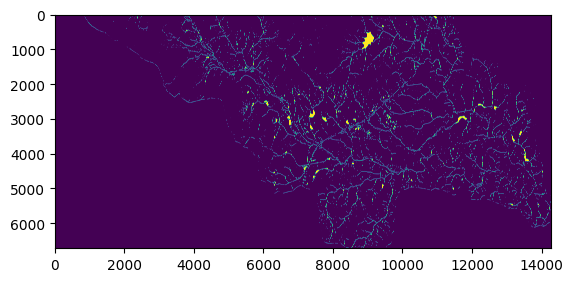

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

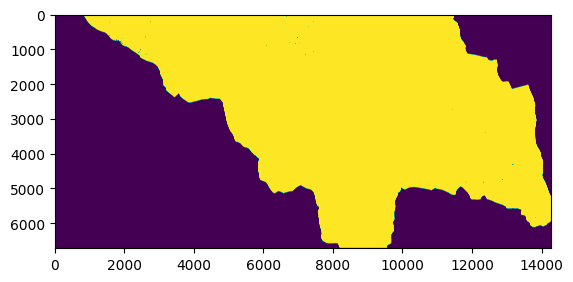

In [ ]:
plt.imshow(image_clean)

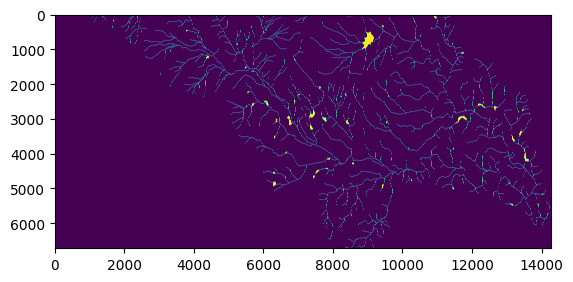

In [ ]:
plt.imshow(ref_image_clipped)